## Part1:Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import glob
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [2]:
file_list = glob.glob('./data/*.csv')
file_list

['./data\\gender_submission.csv', './data\\test.csv', './data\\train.csv']

In [3]:
data = pd.read_csv(file_list[2])

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() # NA 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

+ Age, Cabin, Embarked 에 NA 값이 있으니 이를 처리할 방법을 찾아보자

### 생존자는 얼마나 되나?

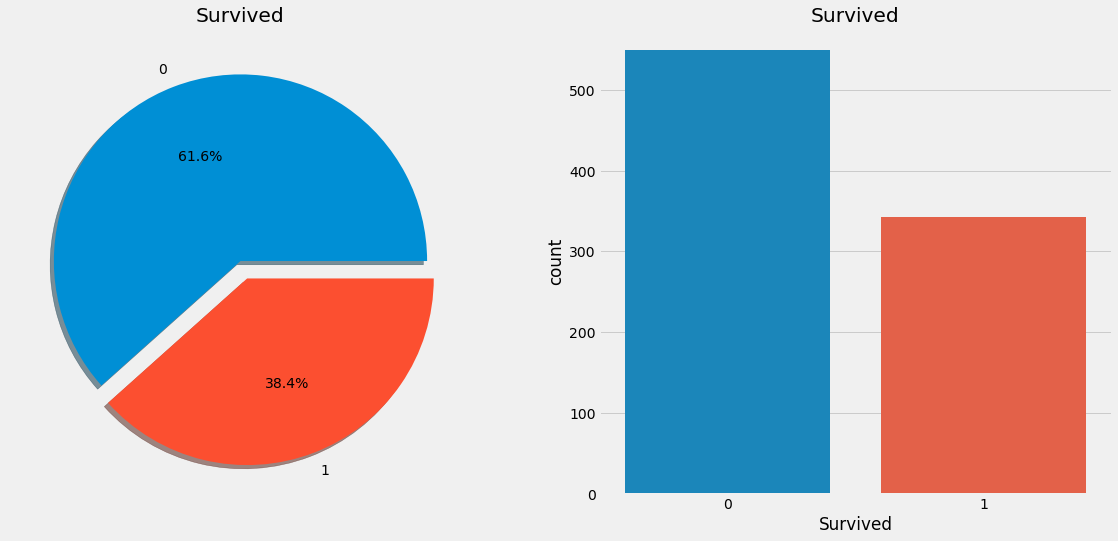

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

## 변수의 종류
   
### 범주형 변수
명목 변수라고도 한다. 순서를 갖지 않아 정렬할 수 없다.
데이터 셋에서 Sex, Embarked가 범주형 변수이다.

### 서열변수
범주형 변수와 유사하나, 대상 간에 높고 낮음을 부여하여 순위를 파악하는 변수이다. 단 변수값에 사칙연산을 적용할 수 없다.
데이터 셋에서 PClass가 서열변수 이다.

### 연속형 변수
최소값과 최대값 사이의 연속된 값을 갖는 변수이다.
데이터 셋에서 Age, Fare가 연속형 변수이다.

## 변수 분석

### Sex ; Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

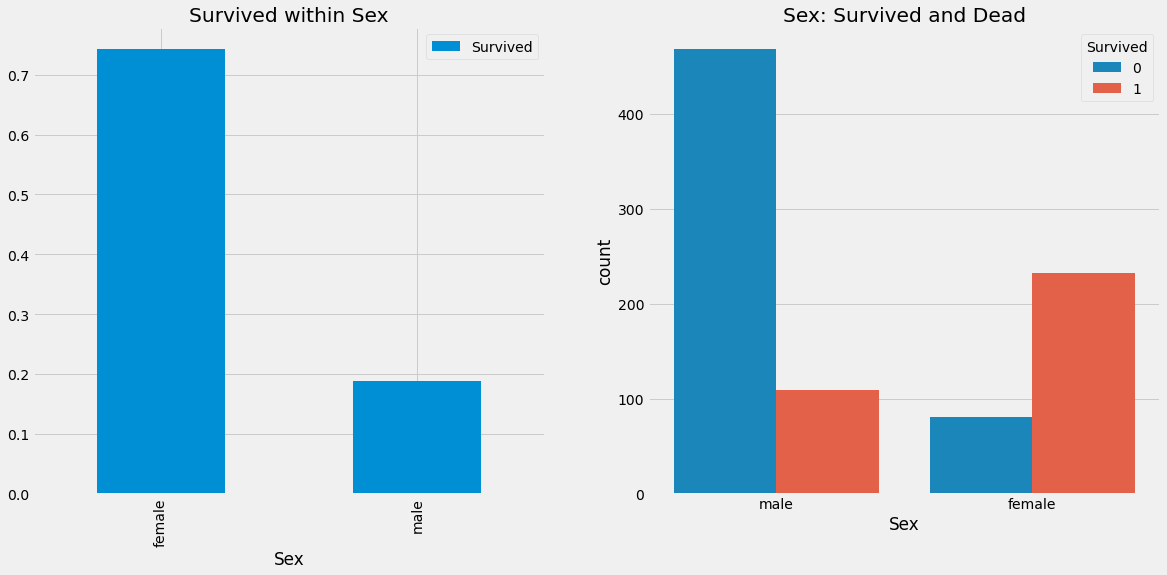

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived within Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived and Dead')

plt.show()

+ 남자가 여자보다 많이 탔지만 살아남은 수는 여자가 남자보다 많다.

### Pclass; 서열변수

In [9]:
pd.crosstab(data['Pclass'], data['Survived']).style.background_gradient(cmap='autumn_r')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [11]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


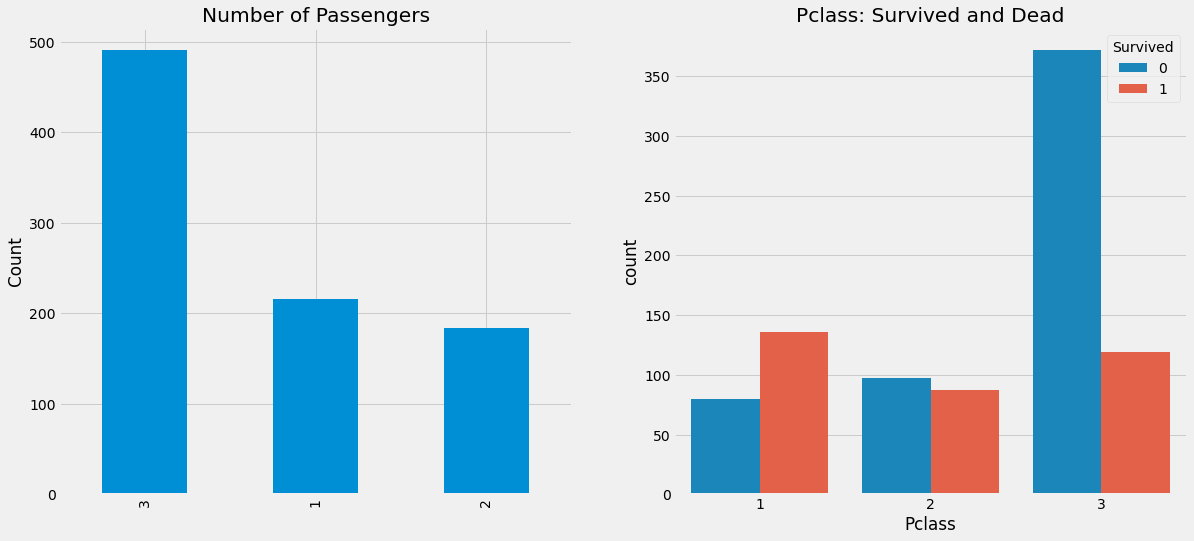

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived and Dead')

plt.show()

In [15]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='autumn_r')

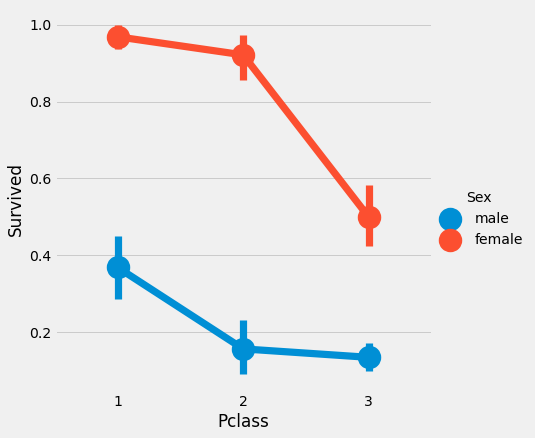

In [19]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data, size=6)
plt.show()